#**Graded Challenge 1 Phase 1**
## **Uber and Lyft Cab Prices Prediction Using Linear Regression and its Visualization**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Dian)

---
```
Table of Contents:
1. Introduction
2. Problem Statement
3. Objection and Goals
4. Data Preparation
   4.1. Importing Libraries
   4.2. Data Loading
   4.3. EDA
5. Data Preprocessing
   5.1. Data Inference
   5.2. Train and Test Data
   5.3. Skewness
   5.4. Missing Values
   5.5. Outliers
   5.6. Features Selection
        5.6.1. Feature Scaling: Numerical
        5.6.2. Feature Encoding: Categorical
        5.6.3. Concatenate between Numerical and Categorical Columns
6. Model Definition
7. Model Training
8. Model Evalutation
9. Model Inference
   9.1. Outliers
   9.2. Feature Selection
10. Conclusion
```

---
## **1. Introduction**

Uber and Lyft's ride prices are not constant like public transport. They are two big C2C platforms, with a service of **ride-hailing**, greatly affected by the demand and supply of rides at a given time, especially in Boston, MA.

From booking the cab to paying the bill, both services have almost similar core features. But there are some unique cases where the two ride-hailing services come neck to neck. One such is pricing, especially dynamic pricing called *surge* in Uber and *Prime Time* in Lyft.

**Problem Statements**

*What exactly drives this demand and the changes of pricing for these two ride-sharing platforms?*

The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home. Another guess would be the weather; rain/snow should cause more people to take rides.

The data chosen is about Uber and Lyft ride in Boston, MA, we will use a Linear Regression Model to predict the price of the given the features in the datasets.

**Objectives**

In this analysis, there are some features that should be tested. The analysis used is Linear Regression model, to predict the price of the given the featuresin the datasets. These are the features or independent Variables are:
- `Distance`
- `Temperature`
- `Wind`
- `Humidity`
- `Visibility`
- `UV Index`
- `Ozone`
- `Cloud Cover`

Meanwhile, the target is only `price` because our objective is to find the price predicition based on the model with features.

**Problems:** Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

## **2. Importing Libraries**

Libraries used for analysis will be mainly sklearn

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats

# Data visualization libraries
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

## **3. Data Loading**

In [2]:
# Loading data raw from Kaggle
url = "/content/drive/MyDrive/Colab Notebooks/Dataset/rideshare_kaggle.csv"
df = pd.read_csv(url)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Based on the overall information, we can see that the range index we have is `693,071`. However, only `price` has `637976` index. After checking the total number of null values, we can see there are `55095` missing values from price.

In [4]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# Checking Missing Values
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## **4. Exploratory Data Analysis (EDA)**

There are some data that we should explore more about these `ride-hailing` platforms. From these data, we can choose features that are important and redundant based on the descriptive statistics. In part 5 about Data Preprocessing, we can focus on more the data which have `a high correlation` with the target (price).

### **4.1. Basic Information**

Basic information provide some graphs and charts which represent numbers and distribution of the original data.

**Cab Type: Uber vs Lyft**

The distribution between Uber and Lyft can be observed that it has `11.2%` difference with Uber winning the market of ride-hailing platforms.

In [7]:
# Uber vs Lyft
df.cab_type.value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

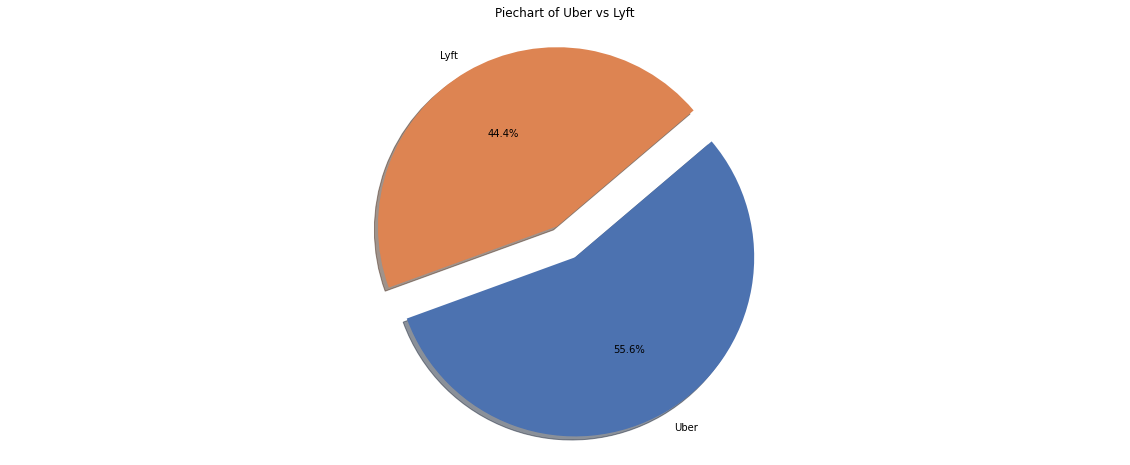

In [8]:
# Creating Plot piechart of Cab Type (Uber vs Lyft)
cabType = dict(df.cab_type.value_counts())
labels = 'Uber', 'Lyft'
sizes = [cabType["Uber"], cabType["Lyft"]]
explode = (0, 0.2)

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Uber vs Lyft')
plt.show()

Meanwhile the distribution of name of services from Uber and Lyft are almost the same, with ranged `51,000` to `55,100`. We can evaluate if users tend not to see what kind of service they want to order.

In [9]:
# Counting name of service from both Uber and Lyft
df.name.value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

**Locations: Source and Destination**

Based on the location where users ordered and destination, we can see that there is no significant difference because the distribution of the order location is almost the same.

In [10]:
# Checking Source locations
df.source.value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

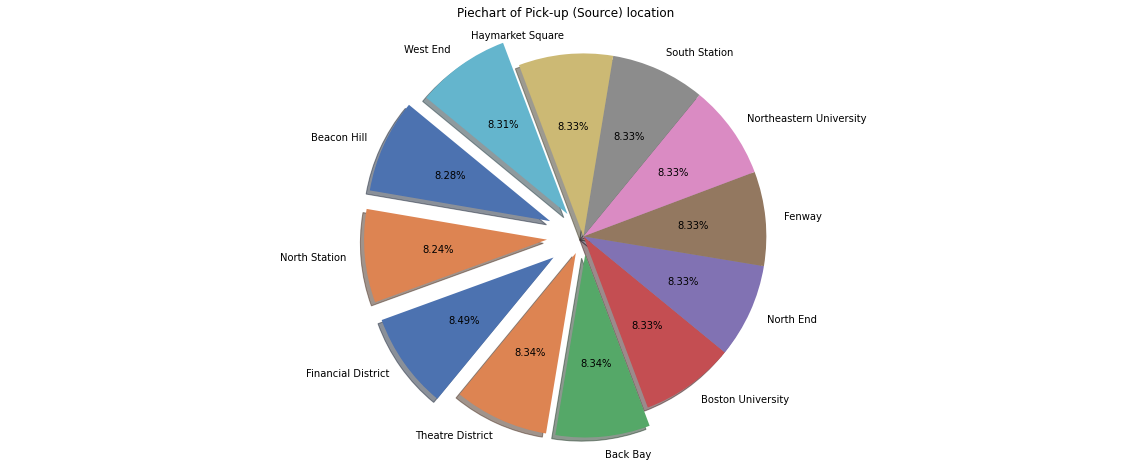

In [11]:
# Creating Plot piechart of source location
source_location = dict(df.source.value_counts())
labels = 'Financial District', 'Theatre District','Back Bay','Boston University','North End','Fenway','Northeastern University','South Station','Haymarket Square','West End','Beacon Hill','North Station'
sizes = [source_location["Financial District"], 
         source_location["Theatre District"],
         source_location['Back Bay'], 
         source_location['Boston University'],
         source_location['North End'],
         source_location['Fenway'],
         source_location['Northeastern University'],
         source_location['South Station'],
         source_location['Haymarket Square'],
         source_location['West End'],
         source_location['Beacon Hill'],
         source_location['North Station']
         ]

explode = (0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0.15, 0.2, 0.2) 

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.2f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Pick-up (Source) location')
plt.show()

In [12]:
# Checking Destination locations
df.destination.value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

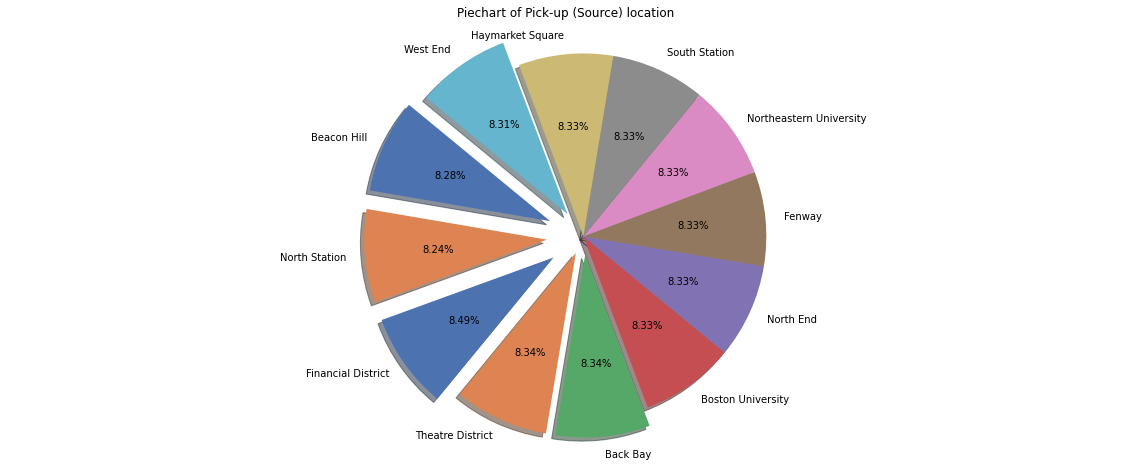

In [13]:
# Creating Plot piechart of destination location
destination_location = dict(df.destination.value_counts())
labels = 'Financial District', 'Theatre District','Back Bay','Boston University','North End','Fenway','Northeastern University','South Station','Haymarket Square','West End','Beacon Hill','North Station'
sizes = [destination_location["Financial District"], 
         destination_location["Theatre District"],
         destination_location['Back Bay'], 
         destination_location['Boston University'],
         destination_location['North End'],
         destination_location['Fenway'],
         destination_location['Northeastern University'],
         destination_location['South Station'],
         destination_location['Haymarket Square'],
         destination_location['West End'],
         destination_location['Beacon Hill'],
         destination_location['North Station']
         ]

explode = (0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0.15, 0.2, 0.2) 

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.2f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Pick-up (Source) location')
plt.show()

**Distance**

After we checked the distance for each other, the average of distance between source and destination location is around `2.2 miles`. This will be important to know the proximity price with distance.

In [14]:
# Average distance
print(f'Average distance: ', df['distance'].mean(), 'miles.')

Average distance:  2.1894297553930255 miles.


Text(0.5, 1.0, 'Histogram of Distance (miles)')

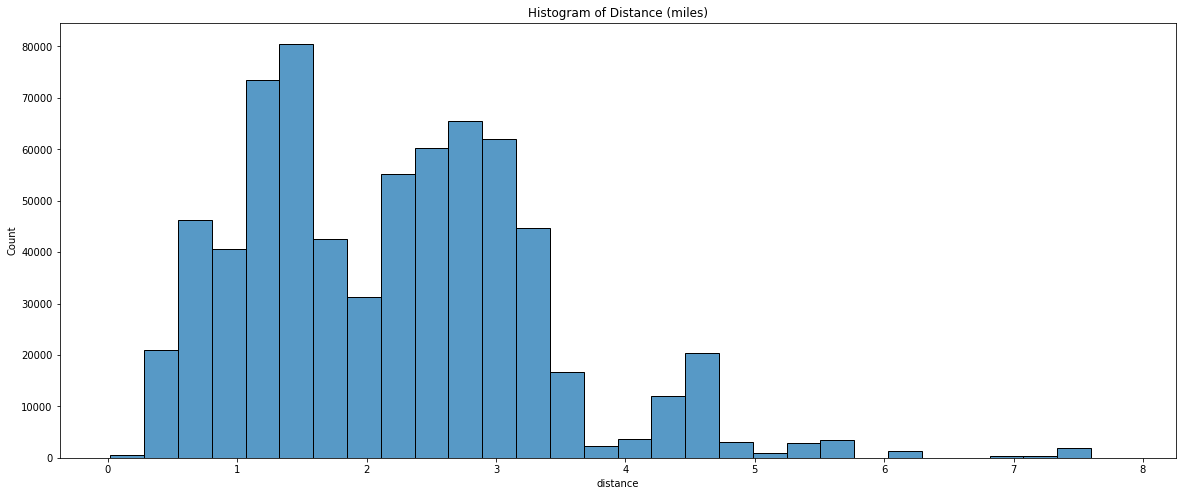

In [15]:
plt.subplot(1,1,1)
sns.histplot(df['distance'], kde=False, bins=30)
plt.title('Histogram of Distance (miles)')

**Time**

In [16]:
# Checking ride-hailing by Month
df.month.value_counts()

12    406614
11    286457
Name: month, dtype: int64

Text(0.5, 1.0, 'Histogram of Number of Services per Month')

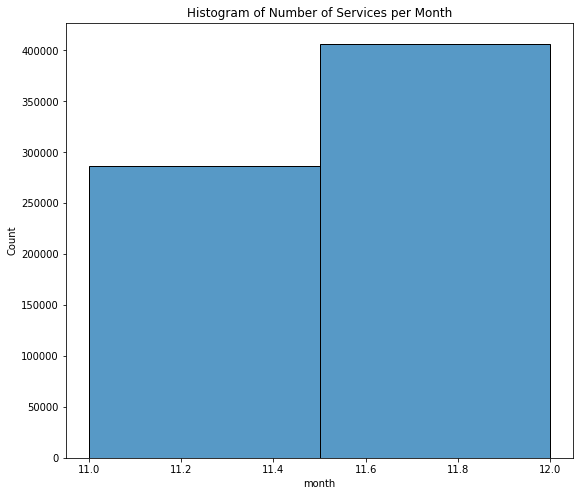

In [17]:
plt.subplot(1,2,1)
sns.histplot(df['month'], kde=False, bins=2)
plt.title('Histogram of Number of Services per Month')

Text(0.5, 1.0, 'Histogram of Number of Services per Day')

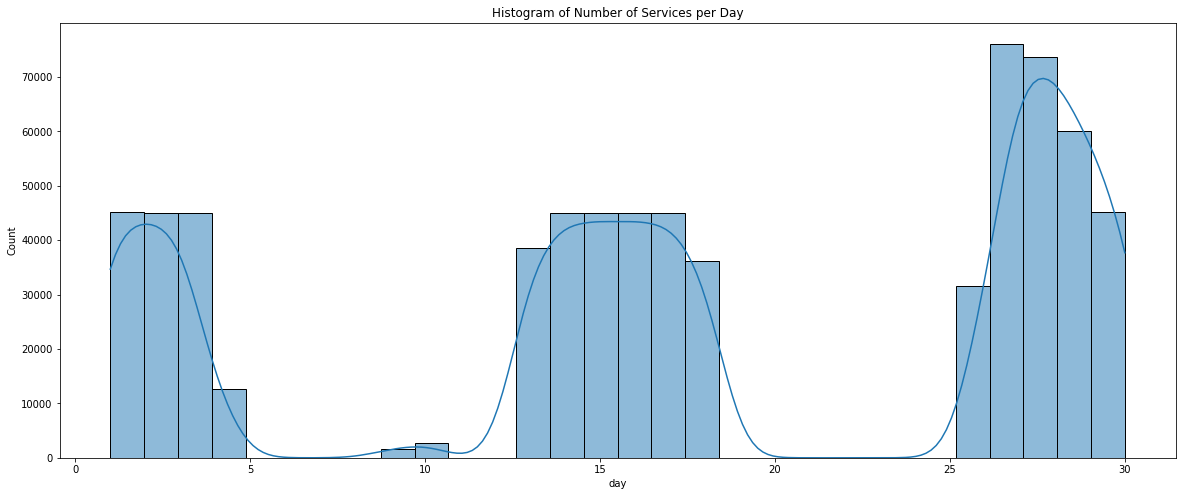

In [18]:
# Checking ride-hailing by day
df.day.value_counts()

plt.subplot(1,1,1)
sns.histplot(df['day'], kde=True, bins=30)
plt.title('Histogram of Number of Services per Day')

Text(0.5, 1.0, 'Histogram of Number of Services per Hour')

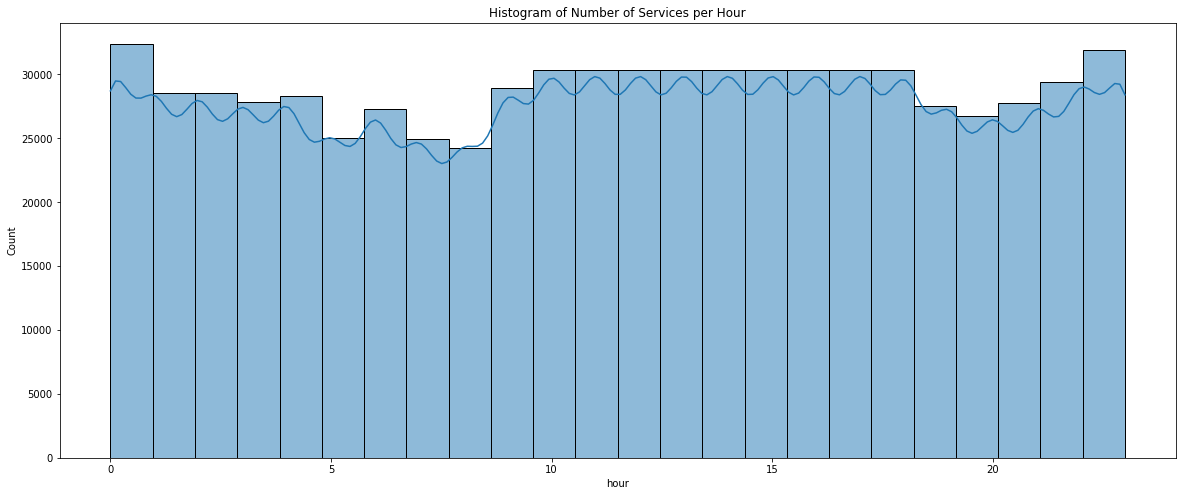

In [19]:
# Checking ride-hailing by hour
df.day.value_counts()

plt.subplot(1,1,1)
sns.histplot(df['hour'], kde=True, bins=24)
plt.title('Histogram of Number of Services per Hour')

**Price**

Text(0.5, 1.0, 'Histogram of Price')

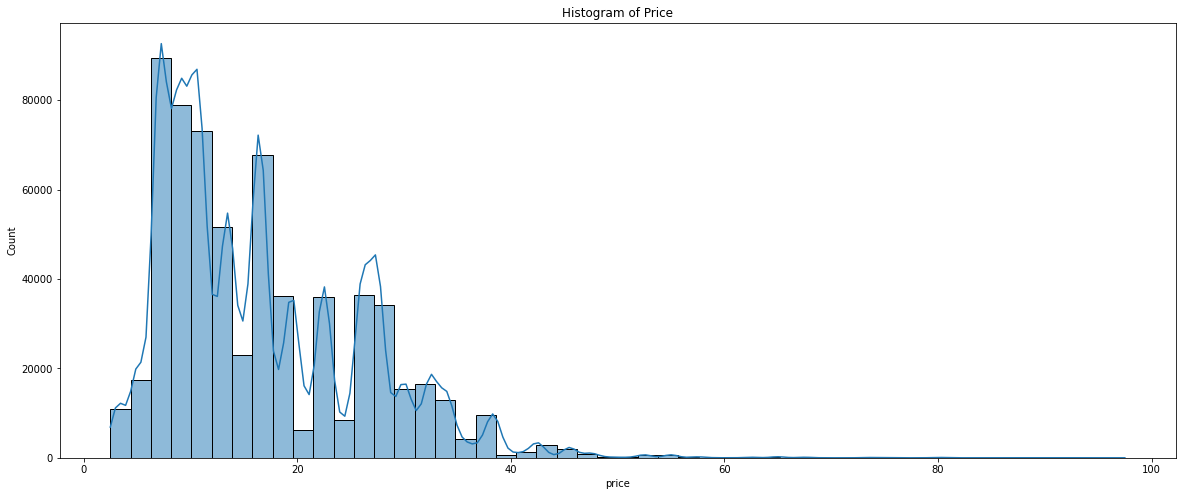

In [20]:
plt.subplot(1,1,1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Histogram of Price')

In [21]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

### **4.2. Correlation Matrix Analysis**

**Temperature**

First, it is important to check the correlation of temperature related features with our target feature (Price).

Based on the correlation matrix result, apparently `price` has no correlation with the temperature. This can be one of the consideration **to omit the temperature** in features selection.

In [22]:
# Creating new dataframe for temperature with price
temperature_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                   'apparentTemperatureLow','temperatureMin','temperatureMax',
                   'apparentTemperatureMin','apparentTemperatureMax','price']
df_temperature = df[temperature_cols]
df_temperature.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75,9.0


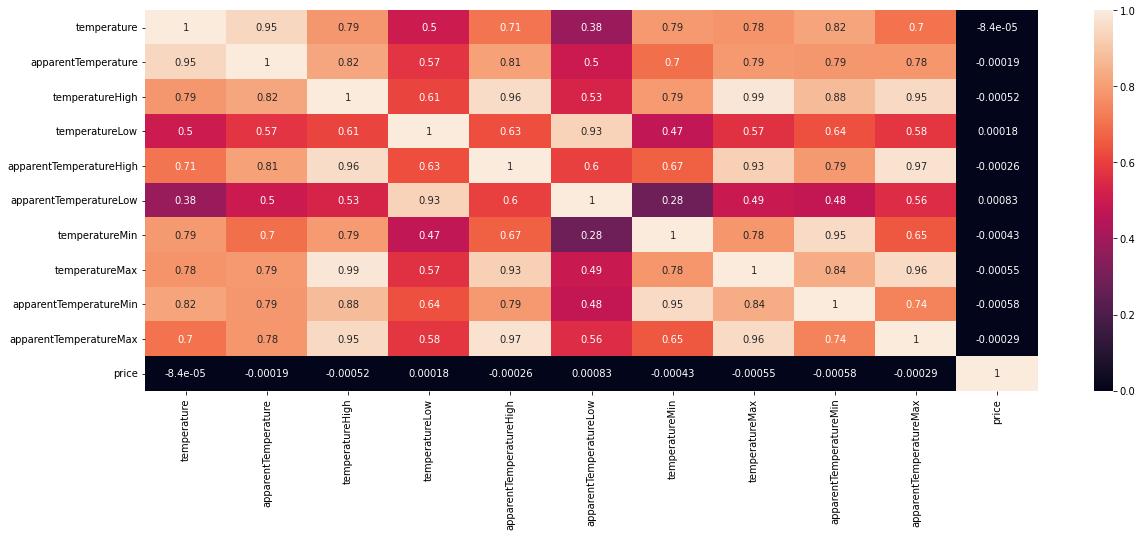

In [23]:
# Plotting Correlation Matrix of Temperature and Price
plt.figure(figsize=(20,7))
sns.heatmap(df_temperature.corr(),annot=True)

**Climate**

We can also observe that the correlation between cliamte and price is almost zero, which means no correlation at all. Climate features should **be considered to be omitted**.

In [24]:
# Creating new dataframe for climate with price
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility',
                'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
                'precipIntensityMax','price']
df_climate = df[climate_cols]
df_climate.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


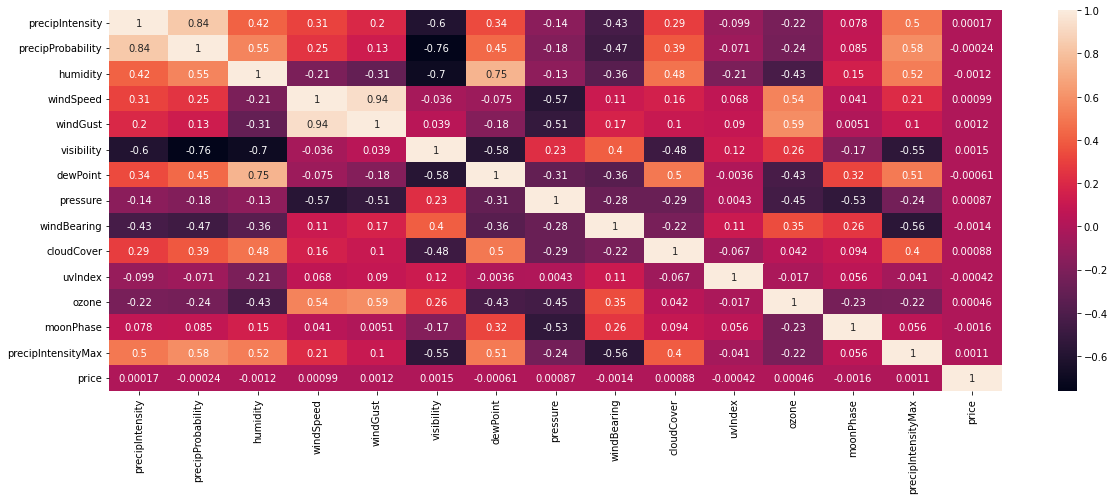

In [25]:
# Plotting Correlation Matrix of Climate and Price
plt.figure(figsize=(20,7))
sns.heatmap(df_climate.corr(),annot=True)

**Categories**

Finally, by checking the category columns, we can see there are many columns that should be dropped because of their incomplete and redundant information such as `id`, `datetime`, `timezone`, `product id`, and `long summary`. Further selection will be considered after data cleaning.

In [26]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a

From here, we should check the correlation between these categorical columns with price.

In [27]:
category_col = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon', 'price']

df_categorical = df[category_col]
df_categorical.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [28]:
# Using LabelEncoder to make categorical to be numerical data
le = LabelEncoder()

df_categorical_encode = df_categorical.copy()
for col in df_categorical_encode.select_dtypes(include='O').columns:
    df_categorical_encode[col]=le.fit_transform(df_categorical_encode[col])

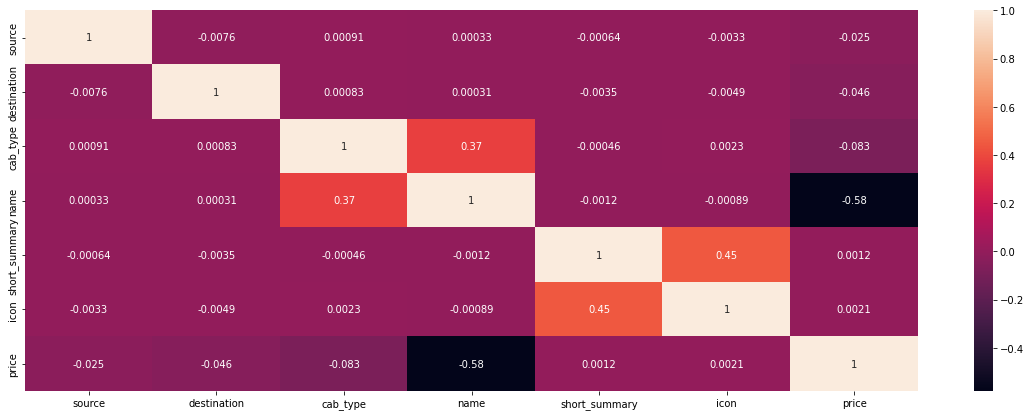

In [29]:
# Plotting Correlation Matrix of Categorical columns and Price
plt.figure(figsize=(20,7))
sns.heatmap(df_categorical_encode.corr(),annot=True)

We can see only `name` feature that has a correlation, which is basically stronger than other features. `Source`, `destination`, and `cab_type` features have relatively weaker correlation, but `cab_type` has a stronger correlation than other two features. Meanwhile, `short_summary` and `icon` have almost no correlation. From here, we can consider which feature that could be included.

## **5. Data Preprocessing**

In [30]:
# Dropping redundant features, especially related the date features.
df_ori = df.copy()

df = df.drop(['id', 'hour','day','month','datetime','timestamp','timezone','product_id','long_summary', 'icon',
              'windGustTime','temperatureHighTime','temperatureLowTime', 'apparentTemperatureHighTime',
              'apparentTemperatureLowTime', 'windBearing', 'uvIndex', 'sunriseTime', 'sunsetTime',
              'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime',
              'apparentTemperatureMaxTime',
              'visibility.1', 'latitude', 'longitude','moonPhase', 'windGust', 'visibility', 'dewPoint',
              'windBearing', 'cloudCover', 'ozone', 'precipIntensityMax',
              'apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
              'apparentTemperatureLow','temperatureMin','temperatureMax',
              'apparentTemperatureMin','apparentTemperatureMax',
              'temperature','precipIntensity','precipProbability','humidity','windSpeed','pressure'],axis=1)

In [31]:
df

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693067,West End,North End,Uber,UberX,9.5,1.00,1.0,Partly Cloudy
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


### **5.1. Data Inference**

Data inference is different from train and test set, which is basically still original and it will be the data after the model is trained and tested, to know if the model is working for other raw dataset. From here, we seperated the data at least 10,000 data.

In [32]:
# Creating data inference
df_inf = df.sample(10000, random_state=33).sort_index()
df_inf

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
34,North Station,Northeastern University,Lyft,Lux,19.5,3.24,1.0,Partly Cloudy
154,Back Bay,North End,Uber,UberPool,8.5,2.32,1.0,Overcast
159,North Station,North End,Lyft,Lyft XL,11.0,1.02,1.0,Overcast
289,Northeastern University,Beacon Hill,Uber,UberPool,9.0,2.63,1.0,Overcast
370,South Station,Beacon Hill,Uber,UberX,11.5,2.58,1.0,Mostly Cloudy
...,...,...,...,...,...,...,...,...
692888,South Station,Theatre District,Uber,UberX,9.5,1.30,1.0,Overcast
692945,Northeastern University,West End,Lyft,Shared,7.0,2.83,1.0,Partly Cloudy
693021,North End,Back Bay,Lyft,Lyft XL,19.5,2.88,1.0,Overcast
693039,North End,Beacon Hill,Lyft,Lyft,9.0,1.81,1.0,Mostly Cloudy


In [33]:
# Remove inference 
df_train_test = df.drop(df_inf.index)
df_train_test

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693067,West End,North End,Uber,UberX,9.5,1.00,1.0,Partly Cloudy
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


### **5.2. Train and Test Data**

We can see the data inference is 10,000 and it will create the rest new data without data inference 683,071. After that, we split the data into train and test.

In [34]:
# Separating Dataset into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(df_train_test, 
                                                   df_train_test.price, 
                                                   test_size=0.3, 
                                                   random_state=0)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (478149, 8)
Test Size:  (204922, 8)


In [35]:
X_train.sort_index()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...
693064,West End,North End,Uber,Black,17.0,1.00,1.0,Overcast
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


In [36]:
X_test.sort_index()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
5,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,Overcast
13,North End,West End,Uber,Black,16.0,1.11,1.0,Clear
18,North End,West End,Uber,Taxi,NaN,1.11,1.0,Partly Cloudy
19,North Station,Haymarket Square,Lyft,Lyft XL,11.0,0.72,1.0,Clear
23,North Station,Haymarket Square,Lyft,Lux Black XL,26.0,0.72,1.0,Overcast
...,...,...,...,...,...,...,...,...
693057,Theatre District,Haymarket Square,Uber,Black,17.0,1.61,1.0,Mostly Cloudy
693062,Theatre District,Haymarket Square,Uber,WAV,15.0,1.61,1.0,Overcast
693063,Theatre District,Haymarket Square,Uber,Black SUV,27.0,1.61,1.0,Overcast
693065,West End,North End,Uber,WAV,9.5,1.00,1.0,Partly Cloudy


In [37]:
y_train.sort_index()

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693064    17.0
693066    13.0
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 478149, dtype: float64

In [38]:
y_test.sort_index()

5         16.5
13        16.0
18         NaN
19        11.0
23        26.0
          ... 
693057    17.0
693062    15.0
693063    27.0
693065     9.5
693067     9.5
Name: price, Length: 204922, dtype: float64

### **5.3. Skewness**

We can see the result of skewness data is more than 1, which means the data is `skewed`, either right or left skewed. From this skewness, we can decide how to treat `missing values` and `outliers`.

For example, missing values here is `price`, since the skewness is `1.0443469221703672`, thus the price missing values is to be filled with **median** instead of mean, because filling with mean could only be done if the skewness is normal distribution.

Skewness :  1.0443469221703672


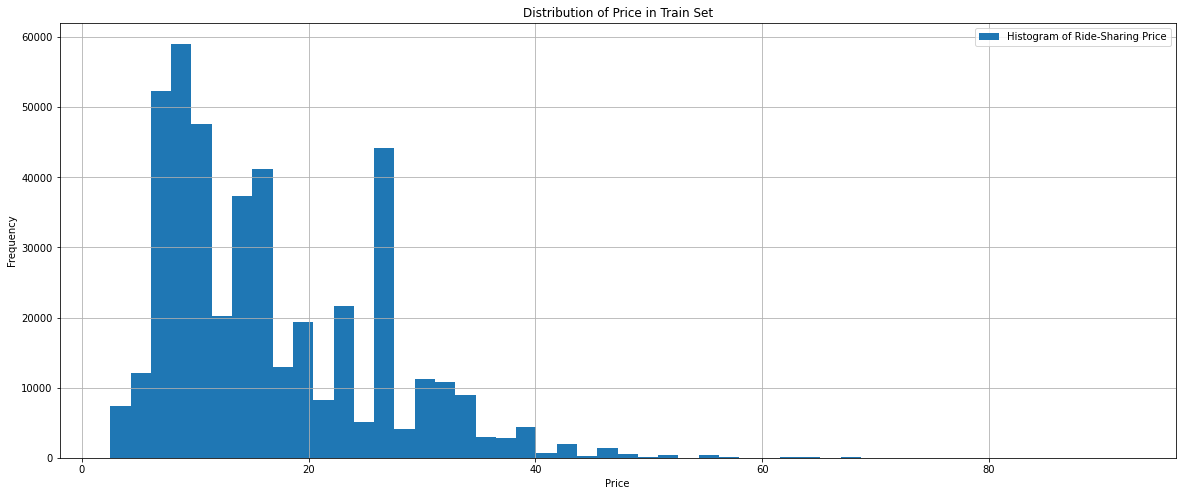

In [39]:
# Checking the Distirbution of Variable `price`: Roght Skewed
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

X_train.price.hist(bins=50, ax=ax, label='Histogram of Ride-Sharing Price') # Histogram of original dataset
ax.set_title('Distribution of Price in Train Set')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train.price.skew())

### **5.4. Missing Values**

Handling missing values will be done by **imputation**. Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used for machine learning or deep learning.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable with :
* Mean : if the variable has a Normal/Gaussian distribution.
* Median : if the variable has a skewed distribution.

Since we have evaluated that the skewness is more than 1, which is skewed, then **the imputation will be replacing missing data with median**.

In [40]:
# Display Value of Median Before Imputation

mean_price = X_train.price.mean()
median_price = X_train.price.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_price)
print('Median Value - Train Set - Before Imputation : ', median_price)

Mean Value - Train Set - Before Imputation   :  16.543319750277835
Median Value - Train Set - Before Imputation :  13.5


In [41]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  X_train[variable+'_mean'] = X_train[variable].fillna(mean_value)
  X_train[variable+'_median'] = X_train[variable].fillna(median_value)
  X_train[variable+'_zero'] = X_train[variable].fillna(0)
  
  return X_train

In [42]:
# Imputation Against Variable `price`
X_train = impute_na(X_train, 'price',mean_price, median_price).sort_index()
X_train

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,price_mean,price_median,price_zero
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,5.00000,5.0,5.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,11.00000,11.0,11.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,7.00000,7.0,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,26.00000,26.0,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,9.00000,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
693064,West End,North End,Uber,Black,17.0,1.00,1.0,Overcast,17.00000,17.0,17.0
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy,13.00000,13.0,13.0
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy,16.54332,13.5,0.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy,27.00000,27.0,27.0


In [43]:
# Checking the change of Standard Deviation after imputation

print('Standard Deviation - Orignal                 : ', X_train['price'].std())
print('Standard Deviation - After Mean Imputation   : ', X_train['price_mean'].std())
print('Standard Deviation - After Median Imputation : ', X_train['price_median'].std())

Standard Deviation - Orignal                 :  9.326705684809191
Standard Deviation - After Mean Imputation   :  8.946998960194179
Standard Deviation - After Median Imputation :  8.984911707417243


<Figure size 1440x576 with 0 Axes>

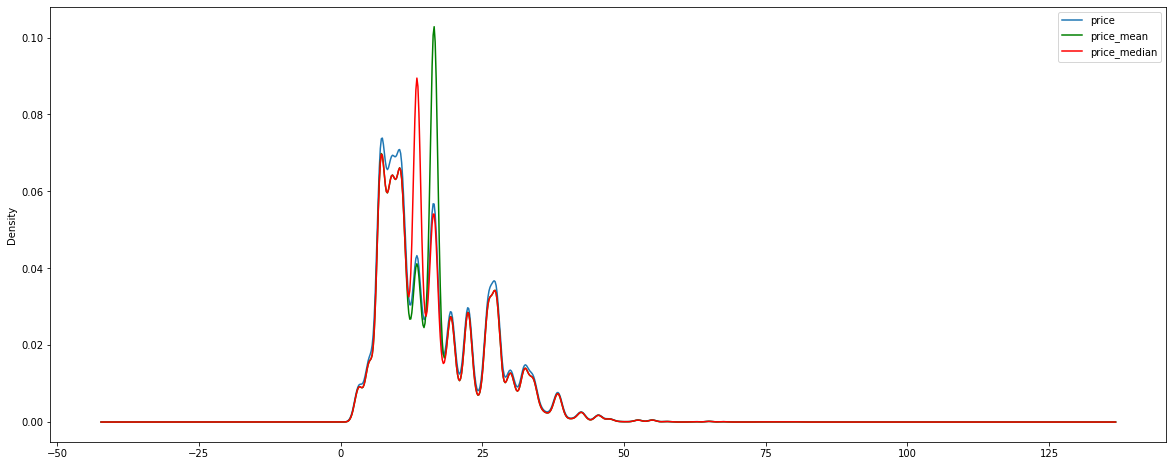

In [44]:
# Visualization Variable `Price` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

X_train.price.plot(kind='kde', ax=ax)
X_train.price_mean.plot(kind='kde', ax=ax, color='green')
X_train.price_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

The plot above shows the difference of distribution of `price` before and after imputation using mean and median as the null replacement. We can see if only we used mean imputation, this would not change the fact that the data will be still right skewed. By using median imputation to fill missing values, the data distribution will tend to be normal.

In [45]:
# Replacing NaN for one column:
X_train['price'] = X_train['price'].fillna(X_train['price'].median()).sort_index()
X_test['price'] = X_test['price'].fillna(X_test['price'].median()).sort_index()
X_train

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,price_mean,price_median,price_zero
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,5.00000,5.0,5.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,11.00000,11.0,11.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,7.00000,7.0,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,26.00000,26.0,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,9.00000,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
693064,West End,North End,Uber,Black,17.0,1.00,1.0,Overcast,17.00000,17.0,17.0
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy,13.00000,13.0,13.0
693068,West End,North End,Uber,Taxi,13.5,1.00,1.0,Partly Cloudy,16.54332,13.5,0.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy,27.00000,27.0,27.0


In [46]:
# Checking Missing Values after filling NaN price with median (X_train)
X_train.isna().sum().sum()

0

In [47]:
# Checking Missing Values after filling NaN price with median (X_test)
X_test.isna().sum().sum()

0

### **5.5. Outliers**

**Handling Outliers for X_train "price"**

We can see there are many extreme values in X_train, we should identify which values should be removed after we use IQR 1.5.

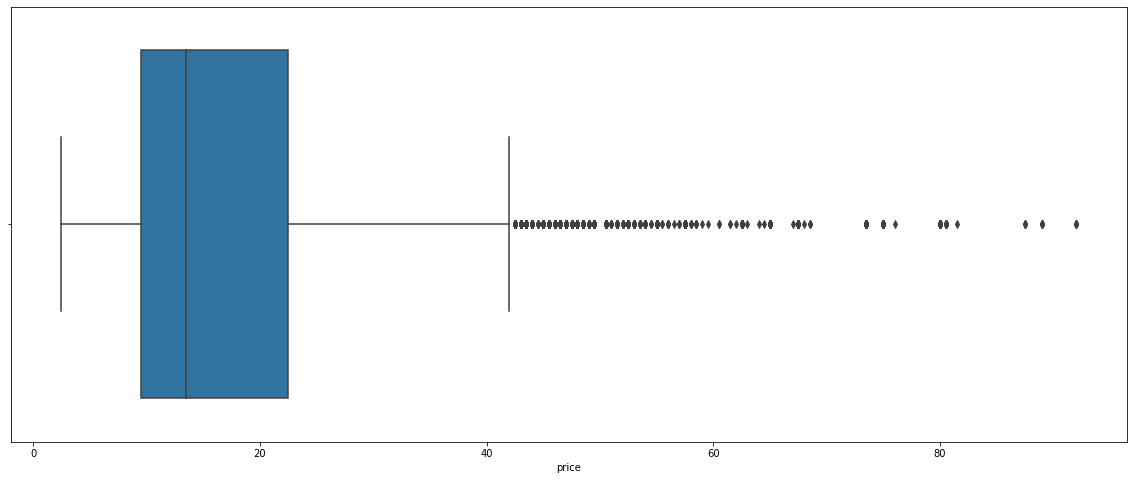

In [48]:
# Boxplot for checking extreme values
sns.boxplot(x = X_train['price'])
plt.show()

In [49]:
# Sorting X_train
X_train['price'].sort_index()

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693064    17.0
693066    13.0
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 478149, dtype: float64

In [50]:
# Finding variance
X_train['price'].var()

80.72863839008343

In [51]:
# Finding standard deviation
X_train['price'].std()

8.984911707417243

In [52]:
# Calculating Limit
Q1 = X_train['price'].quantile(0.25)
Q3 = X_train['price'].quantile(0.75)
IQR = Q3 - Q1

In [53]:
# Calculating Upper Limit Fence
upper_limit = X_train[X_train['price']>(Q3+(1.5*IQR))]

# Calculating Lower Limit Fence
lower_limit = X_train[X_train['price']<(Q1-(1.5*IQR))]

In [54]:
# Checking size before and after removing outliers for X_train
print('Size before removing outliers:',X_train.shape)
X_train_final = X_train[~((X_train['price']>(Q3+(1.5*IQR))))]
print('Size after removing outliers:', X_train_final.shape)

Size before removing outliers: (478149, 11)
Size after removing outliers: (472610, 11)


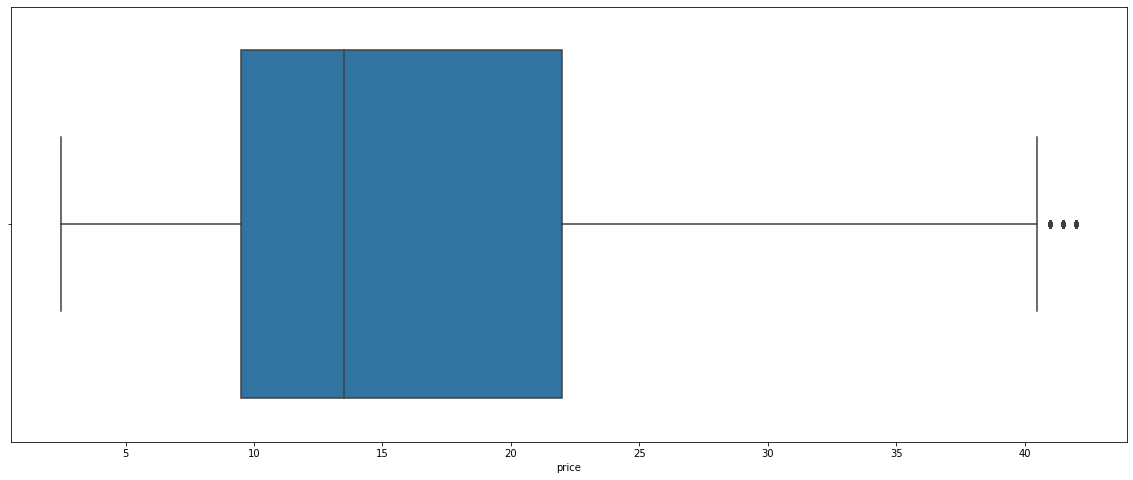

In [55]:
# Checking boxplot after removing outliers
sns.boxplot(x = X_train_final['price'])
plt.show()

We can see the Q1 should be around 9 dollars and Q3 should be around 22 dollars. This is important to understand the range of price and the average price from the train data set.

**y_train and y_test Missing Values**

In [56]:
X_train_final.isna().sum().sum()

0

In [57]:
# Replacing NaN values in y_train and y_test:
y_train = X_train_final['price']
y_test = X_test['price']
y_train

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693064    17.0
693066    13.0
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 472610, dtype: float64

In [58]:
y_train.isna().sum().sum()

0

In [59]:
y_test.isna().sum().sum()

0

### **5.6. Feature Selection**

Feature selection is to choose which features that wull be used for the model to minimize the leak and error data bigger than the expectation. Features that we drop here is `price`, as the target. If the target is included as feature, then the error data will be happening.

In [60]:
# Drop price because it is a target, not a feature
X_train_final = X_train_final.drop(['price','price_mean', 'price_median', 'price_zero','source','destination'],axis=1)

In [61]:
X_train_final.describe()

,distance,surge_multiplier
count,472610.000000,472610.000000
mean,2.167191,1.010720
std,1.116594,0.077538
min,0.020000,1.000000
25%,1.260000,1.000000
50%,2.140000,1.000000
75%,2.880000,1.000000
max,7.860000,3.000000


In [62]:
# Splitting between numerical columns and categorical columns
num_columns = X_train_final.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_final.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns  : ', num_columns)
print('Categorical columns  : ', cat_columns)

Numerical columns  :  ['distance', 'surge_multiplier']
Categorical columns  :  ['cab_type', 'name', 'short_summary']


In [63]:
# Split Numerical and Categorical
X_train_num = X_train_final[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train_final[cat_columns]
X_test_cat = X_test[cat_columns]

#### **5.6.1. Feature Scaling: Numerical**

In [64]:
# Checking numerical dataframe
X_train_num = X_train_num.sort_index()
X_test_num = X_test_num.sort_index()
X_train_num

,distance,surge_multiplier
0,0.44,1.0
1,0.44,1.0
2,0.44,1.0
3,0.44,1.0
4,0.44,1.0
...,...,...
693064,1.00,1.0
693066,1.00,1.0
693068,1.00,1.0
693069,1.00,1.0


In [65]:
# Making feature scaling for numerical columns
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train_num.index)
X_train_num_scaled

,distance,surge_multiplier
0,0.053571,0.0
1,0.053571,0.0
2,0.053571,0.0
3,0.053571,0.0
4,0.053571,0.0
...,...,...
693064,0.125000,0.0
693066,0.125000,0.0
693068,0.125000,0.0
693069,0.125000,0.0


In [66]:
# X_test_num
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns, index = X_test_num.index)
X_test_num_scaled

,distance,surge_multiplier
5,0.053571,0.0
13,0.139031,0.0
18,0.139031,0.0
19,0.089286,0.0
23,0.089286,0.0
...,...,...
693057,0.202806,0.0
693062,0.202806,0.0
693063,0.202806,0.0
693065,0.125000,0.0


#### **5.6.2. Feature Encoding: Categorical**

The categorical feature will be encoded with OneHotEncoding, because we do not need to rank anything from the feature.

In [67]:
# Making feature encoding for categorical columns
catgeories_col = ['cab_type','name','short_summary']
X_train_cat = X_train_cat[catgeories_col].sort_index()
X_test_cat = X_test_cat[catgeories_col].sort_index()
X_train_cat

,cab_type,name,short_summary
0,Lyft,Shared,Mostly Cloudy
1,Lyft,Lux,Rain
2,Lyft,Lyft,Clear
3,Lyft,Lux Black XL,Clear
4,Lyft,Lyft XL,Partly Cloudy
...,...,...,...
693064,Uber,Black,Overcast
693066,Uber,UberXL,Partly Cloudy
693068,Uber,Taxi,Partly Cloudy
693069,Uber,Black SUV,Partly Cloudy


In [68]:
# LabelEncoder and OneHotEncoder will be used for encoding, because there is no need to rank
ohc = OneHotEncoder()

In [69]:
# Encoding OneHotEncoder (ohc) based on the labeled X_train_cat
X_train_cat_encoded = ohc.fit_transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, index=X_train_cat.index).sort_index()
X_train_cat_encoded

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693064,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
693066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693069,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
 # Encoding OneHotEncoder (ohc) based on the labeled X_test_cat
 X_test_cat_encoded = ohc.transform(X_test_cat).toarray()
 X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, index = X_test_cat.index).sort_index()
 X_test_cat_encoded

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693057,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693062,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
693063,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
693065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### **5.6.3. Concatenate between Numerical and Categorical Columns**

In [71]:
# Create dataframe X_train_final
X_train_final = pd.concat([X_train_cat_encoded, X_train_num_scaled], axis=1)
X_train_final = X_train_final.sort_index()
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,distance,surge_multiplier
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.053571,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053571,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693064,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.125000,0.0
693066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.0
693068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.0
693069,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.0


In [72]:
# Create dataframe X_test_final
X_test_final = pd.concat([X_test_cat_encoded, X_test_num_scaled], axis=1)
X_test_final = X_test_final.sort_index()
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,distance,surge_multiplier
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.053571,0.0
13,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139031,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.139031,0.0
19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089286,0.0
23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.089286,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693057,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.202806,0.0
693062,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.202806,0.0
693063,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.202806,0.0
693065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.0


## **6. Model Definition**



In [73]:
# Training using Linear Regression
model_lin_reg = LinearRegression()

## **7. Model Training**

In [74]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

Prediction price for target train set can be observed based on the top 5 head of the test set. We can see that the `Target Predicted (Train)` and `price` from train set has various differences. However, we still can not conclude by the observation. These differences should be evaluated in Model Evaluation part.

In [75]:
# Predicting target (y_train) with linear regression
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_train = pd.DataFrame(y_pred_train, columns=['Target Predicted (Train)'], index=X_train_final.index).sort_index()
y_pred_train

,Target Predicted (Train)
0,1.840576
1,13.011230
2,4.913330
3,26.594727
4,10.609619
...,...
693064,17.639404
693066,12.784912
693068,10.662354
693069,27.193115


In [76]:
# Checking actual target y_train
y_train = pd.DataFrame(y_train).sort_index()
y_train

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693064,17.0
693066,13.0
693068,13.5
693069,27.0


Prediction price for target test set can be observed based on the top 5 head of the test set. We can see that the `Target Predicted (Test)` and `price` from test set has slight differences. However, we still can not conclude by the observation. These differences should be evaluated in Model Evaluation part.

In [77]:
# Predicting target (y_test) with linear regression
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_test = pd.DataFrame(y_pred_test, columns=['Target Predicted (Test)'], index=X_test_final.index).sort_index()
y_pred_test

,Target Predicted (Test)
5,18.165771
13,17.904297
18,10.926270
19,11.261719
23,27.265381
...,...
693057,19.113525
693062,8.368896
693063,28.635986
693065,6.926025


In [78]:
# Checking actual target y_test
y_test = pd.DataFrame(y_test).sort_index()
y_test

,price
5,16.5
13,16.0
18,13.5
19,11.0
23,26.0
...,...
693057,17.0
693062,15.0
693063,27.0
693065,9.5


## **8. Model Evaluation**

**Mean Absolute Error (MAE)**

This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent. MAE does not penalize large errors.

In [79]:
# Model Evaluation using MAE (Mean Absolute Error)
print('Mean Absolute Error (MAE) Train Set: ', mean_absolute_error(y_train, y_pred_train))
print('Maen Absolute Error (MAE) Test Set: ', mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error (MAE) Train Set:  1.6995379274509175
Maen Absolute Error (MAE) Test Set:  1.804365714550079


**Mean Squared Error (MSE)**

The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize. MSE penalizes large errors.

In [80]:
# Model Evaluation using MSE (Mean Squared Error)
print('Mean Squared Error (MSE) Train Set: ', mean_squared_error(y_train, y_pred_train))
print('Maen Squared Error (MSE) Test Set: ', mean_squared_error(y_test, y_pred_test))

Mean Squared Error (MSE) Train Set:  5.270418159216439
Maen Squared Error (MSE) Test Set:  6.983547854641973


In [81]:
# Model Evaluation using RMSE (Root Mean Squared Error)
print('Root Mean Squared Error (RMSE) Train Set: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (RMSE) Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error (RMSE) Train Set:  2.2957391313510427
Root Mean Squared Error (RMSE) Test Set:  2.6426403188179


**R-squared Score**

R-squared determines the strength of the relationship between your linear model and the dependent variables on a 0 - 100% scale. The higher the score to 100%, the better the model is.

In [82]:
# Model Evaluation using r2 Score
print('r2 Score Train Set: ', round(r2_score(y_train, y_pred_train)*100, 2),'%')
print('r2 Score Test Set: ', round(r2_score(y_test, y_pred_test)*100, 2),'%')

r2 Score Train Set:  92.37 %
r2 Score Test Set:  91.34 %


## **9. Model Inference**

In [83]:
# Save the Files

import joblib
import json

with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_onehotencoder.pkl', 'wb') as file_3:
  joblib.dump(ohc, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

In [84]:
# Load All Files

import joblib
import json

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_onehotencoder.pkl', 'rb') as file_3:
  model_onehotencoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

### **9.1. Outliers**

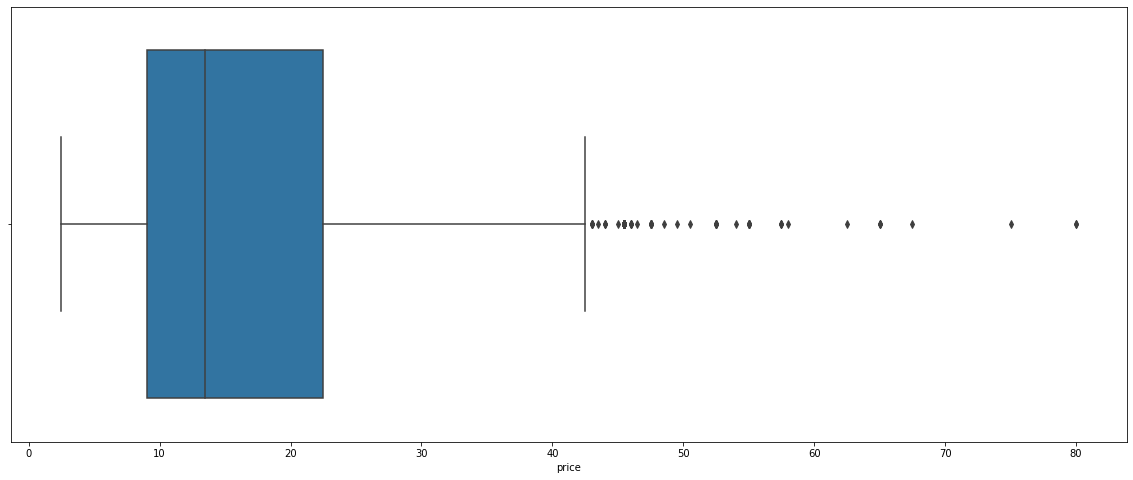

In [85]:
# Boxplot for checking extreme values
sns.boxplot(x = df_inf['price'])
plt.show()

In [86]:
# Calculating Limit
Q1 = df_inf['price'].quantile(0.25)
Q3 = df_inf['price'].quantile(0.75)
IQR = Q3 - Q1

In [87]:
# Calculating Upper Limit Fence
upper_limit = df_inf[df_inf['price']>(Q3+(1.5*IQR))]
upper_limit

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary
2803,Boston University,Financial District,Lyft,Lux Black XL,45.5,4.61,1.00,Clear
3887,Boston University,Financial District,Lyft,Lux Black XL,45.5,4.68,1.00,Mostly Cloudy
6071,Financial District,Northeastern University,Uber,Black SUV,46.5,7.46,1.00,Clear
15550,Fenway,Beacon Hill,Lyft,Lux Black XL,45.5,2.41,1.50,Overcast
15870,Theatre District,North End,Lyft,Lux Black XL,47.5,1.72,1.75,Overcast
...,...,...,...,...,...,...,...,...
657977,Theatre District,Boston University,Lyft,Lux Black,52.5,3.14,2.00,Overcast
670985,Boston University,Financial District,Lyft,Lux Black XL,55.0,4.69,1.25,Clear
674240,Fenway,Financial District,Uber,Black,43.0,7.24,1.00,Partly Cloudy
676211,Northeastern University,Financial District,Lyft,Lux Black XL,57.5,4.22,1.50,Partly Cloudy


In [88]:
# Calculating Lower Limit Fence
lower_limit = df_inf[df_inf['price']<(Q1-(1.5*IQR))]
lower_limit

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary


In [89]:
# Checking size before and after removing outliers for X_train
print('Size before removing outliers:',df_inf.shape)
df_inf_final = df_inf[~((df_inf['price']>(Q3+(1.5*IQR))))]
print('Size after removing outliers:', df_inf_final.shape)

Size before removing outliers: (10000, 8)
Size after removing outliers: (9912, 8)


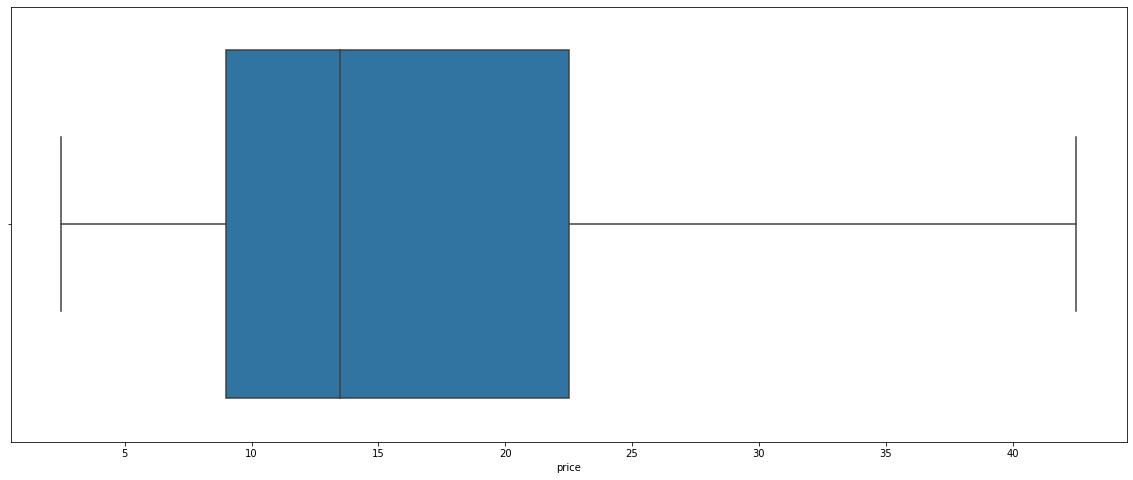

In [90]:
# Checking boxplot after removing outliers
sns.boxplot(x = df_inf_final['price'])
plt.show()

After removing the outliers, we can see that the price between Q1 and Q3 are around 8-23 dollars. We can proceed to the next part, feature selection for data inference.

### **9.2. Feature Selection**

In [91]:
# Calling numerical columns
list_num_cols

['distance', 'surge_multiplier']

In [92]:
# Calling categorical columns
list_cat_cols

['cab_type', 'name', 'short_summary']

In [93]:
# Split between Numerical Columns and Categorical Columns

df_inf_num = df_inf_final[list_num_cols]
df_inf_cat = df_inf_final[list_cat_cols]

df_inf_num

,distance,surge_multiplier
34,3.24,1.0
154,2.32,1.0
159,1.02,1.0
289,2.63,1.0
370,2.58,1.0
...,...,...
692888,1.30,1.0
692945,2.83,1.0
693021,2.88,1.0
693039,1.81,1.0


In [94]:
# Feature Scaling for df_inf
df_inf_num_scaled = model_scaler.transform(df_inf_num)
df_inf_num_scaled = pd.DataFrame(df_inf_num_scaled, columns = df_inf_num.columns, index = df_inf_num.index)
df_inf_num_scaled

,distance,surge_multiplier
34,0.410714,0.0
154,0.293367,0.0
159,0.127551,0.0
289,0.332908,0.0
370,0.326531,0.0
...,...,...
692888,0.163265,0.0
692945,0.358418,0.0
693021,0.364796,0.0
693039,0.228316,0.0


In [95]:
# Feature Encoding for df_inf
df_inf_cat

,cab_type,name,short_summary
34,Lyft,Lux,Partly Cloudy
154,Uber,UberPool,Overcast
159,Lyft,Lyft XL,Overcast
289,Uber,UberPool,Overcast
370,Uber,UberX,Mostly Cloudy
...,...,...,...
692888,Uber,UberX,Overcast
692945,Lyft,Shared,Partly Cloudy
693021,Lyft,Lyft XL,Overcast
693039,Lyft,Lyft,Mostly Cloudy


In [96]:
# Encoding OneHotEncoder (ohc) based on the labeled X_train_cat
df_inf_cat_encoded = model_onehotencoder.transform(df_inf_cat).toarray()
df_inf_cat_encoded = pd.DataFrame(df_inf_cat_encoded, index=df_inf_cat.index).sort_index()
df_inf_cat_encoded

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
34,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
693039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [97]:
# Concate Numerical Columns and Categorical Columns

df_inf_final = pd.concat([df_inf_cat_encoded, df_inf_num_scaled], axis=1)
df_inf_final = df_inf_final.sort_index()
df_inf_final

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,distance,surge_multiplier
34,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.410714,0.0
154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.293367,0.0
159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.127551,0.0
289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.332908,0.0
370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.326531,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.163265,0.0
692945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.358418,0.0
693021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.364796,0.0
693039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.228316,0.0


### **9.3. Model Training (Data Inference)**

In [98]:
# Predict using Linear regression

y_pred_inf = model_lin_reg.predict(df_inf_final)
y_pred_inf

array([19.77539062,  9.0534668 , 11.98046875, ..., 16.44213867,
        8.20947266,  8.3659668 ])

In [99]:
# Create DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['price_prediction'])
y_pred_inf_df

,price_prediction
0,19.775391
1,9.053467
2,11.980469
3,9.797119
4,10.703613
...,...
9907,7.622314
9908,7.583496
9909,16.442139
9910,8.209473


In [100]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_df.reset_index(drop=True)], axis=1)

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,price_prediction
0,North Station,Northeastern University,Lyft,Lux,19.5,3.24,1.0,Partly Cloudy,19.775391
1,Back Bay,North End,Uber,UberPool,8.5,2.32,1.0,Overcast,9.053467
2,North Station,North End,Lyft,Lyft XL,11.0,1.02,1.0,Overcast,11.980469
3,Northeastern University,Beacon Hill,Uber,UberPool,9.0,2.63,1.0,Overcast,9.797119
4,South Station,Beacon Hill,Uber,UberX,11.5,2.58,1.0,Mostly Cloudy,10.703613
...,...,...,...,...,...,...,...,...,...
9995,South Station,Theatre District,Uber,UberX,9.5,1.30,1.0,Overcast,NaN
9996,Northeastern University,West End,Lyft,Shared,7.0,2.83,1.0,Partly Cloudy,NaN
9997,North End,Back Bay,Lyft,Lyft XL,19.5,2.88,1.0,Overcast,NaN
9998,North End,Beacon Hill,Lyft,Lyft,9.0,1.81,1.0,Mostly Cloudy,NaN


## **10. Conclusion**

The linear regression model used has an r-squared more than 90%, which means we can evaluate the model is suitable for the dataset we have to predict `price` as the target. There are some factors that influence the target, either the lack of feature we have that can support the model or the number of data to train the model.

For features, trial-and-error should be done no matter what, especially to train the model. However, there is other way to pick the right feature before training the model. It is also important **to evaluate features first through Exploratory Data Analysis and statistical analysis** (descriptive or inference). **Too many and little features do not mean the model will be better**.

Based on this understanding, we know that number of data should be enough to train the model. **The more data available in the train set, the more model will learn**. How to know that the model learn should be evaluated based on MAE (Mean Absolute Error), MSE (Mean Squared Error), and r-squared.

For MAE and MSE (also RMSE), the less value of error means the better the model is, which means the model learn enough from the data so that the prediction will be more accurate.

Meanwhile for r-squared, we can see that the percentage of the evaluation model, train set has a better result of prediction accuracy. This means that **train set has more data**, which help the model to learn. Meanwhile, test set has less data than train set and that is why the r-squared percentage is less than train set.

**Coefficient**

Coefficient is the slope of the line. We can evaluate that these coefficients are to understand which features that influence the most. We know that linear regression has the formula:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where $a$ is commonly known as the *intercept*, and $x$ is commonly known as the *slope* or *coefficient*. This coefficient will influence the result of target.

For example, we have `distance` feature with coefficient `1.88068566e+01`. This means, the higher `distance` value, the higher the target will be because of the coefficient of distance will be multiplied with the distance value. If the coefficient is negative, then there will be a chance that the target will be lower instead of higher.


In [101]:
# Checking coefficient
model_lin_reg.coef_

array([ 2.35523626e+12,  1.05310543e+12,  9.59914654e+11,  9.59914654e+11,
       -3.42216174e+11, -3.42216174e+11, -3.42216174e+11, -3.42216174e+11,
       -3.42216174e+11, -3.42216174e+11,  9.59914654e+11,  9.59914654e+11,
        9.59914654e+11,  9.59914654e+11,  9.59914654e+11, -4.02353314e+12,
       -4.02353314e+12, -4.02353314e+12, -4.02353314e+12, -4.02353314e+12,
       -4.02353314e+12, -4.02353314e+12, -4.02353314e+12, -4.02353314e+12,
        1.88068566e+01,  2.62223701e+01])

**Intercept**

The distance from the origin to a point where a graph crosses a coordinate axis, and based on the linear regression formula, intercept tend to be constant.

In [102]:
model_lin_reg.intercept_

2010513053036.5522